<a href="https://colab.research.google.com/github/ambitiousyash/cta_data-analysis/blob/main/cta_data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Load Dataset
url = "/content/CTA_-_Ridership_-_Daily_Boarding_Totals.csv"
df = pd.read_csv(url)

In [4]:
# Inspect Data
print(df.head())
print(df.info())
print(df.describe())

  service_date day_type     bus  rail_boardings  total_rides
0   01/01/2001        U  297192          126455       423647
1   01/02/2001        W  780827          501952      1282779
2   01/03/2001        W  824923          536432      1361355
3   01/04/2001        W  870021          550011      1420032
4   01/05/2001        W  890426          557917      1448343
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   service_date    8797 non-null   object
 1   day_type        8797 non-null   object
 2   bus             8797 non-null   int64 
 3   rail_boardings  8797 non-null   int64 
 4   total_rides     8797 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 343.8+ KB
None
                bus  rail_boardings   total_rides
count  8.797000e+03    8.797000e+03  8.797000e+03
mean   7.134930e+05    5.132585e+05  1.226752e+06
std    2.7013

In [5]:
# Data Cleaning
# Convert date column to datetime format
df['service_date'] = pd.to_datetime(df['service_date'])

In [6]:
# Handle missing values
df.dropna(inplace=True)

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)


Index(['service_date', 'day_type', 'bus', 'rail_boardings', 'total_rides'], dtype='object')


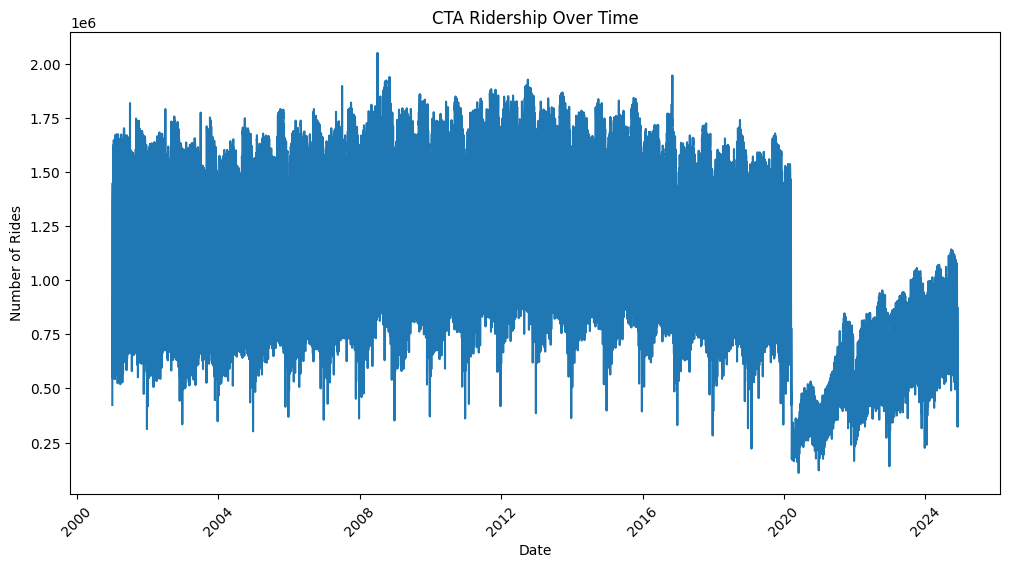

In [13]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
# Verify that 'rides' is the correct column name in your DataFrame
# and that the DataFrame `df` contains the expected data.
# If the column name is different, replace 'rides' with the correct name.
# Check the actual column name for ridership from the dataframe
print(df.columns) # Print the available columns to identify the correct one
# If 'df' is referencing the wrong DataFrame, ensure it's assigned correctly.
sns.lineplot(x='service_date', y='total_rides', data=df, errorbar=None)  # Replace 'total_rides' with the correct column name
plt.title("CTA Ridership Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

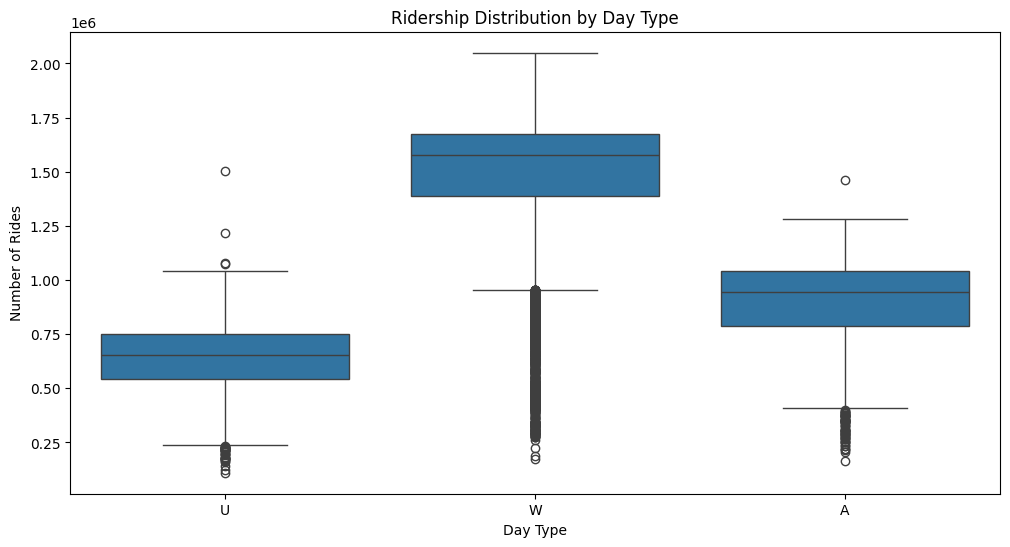

In [15]:
# Boxplot of ridership per station
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_type', y='total_rides', data=df)
plt.title("Ridership Distribution by Day Type")
plt.xlabel("Day Type")
plt.ylabel("Number of Rides")
plt.show()

In [16]:
# Feature Engineering
# Extracting year, month, and day

df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month
df['day'] = df['service_date'].dt.day
df['weekday'] = df['service_date'].dt.weekday

In [19]:
# Splitting Data for Modeling
X = df[['year', 'month', 'day', 'weekday']]
y = df['total_rides']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred = model.predict(X_test)

In [23]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 279603.9102677069
MSE: 124882516203.35016


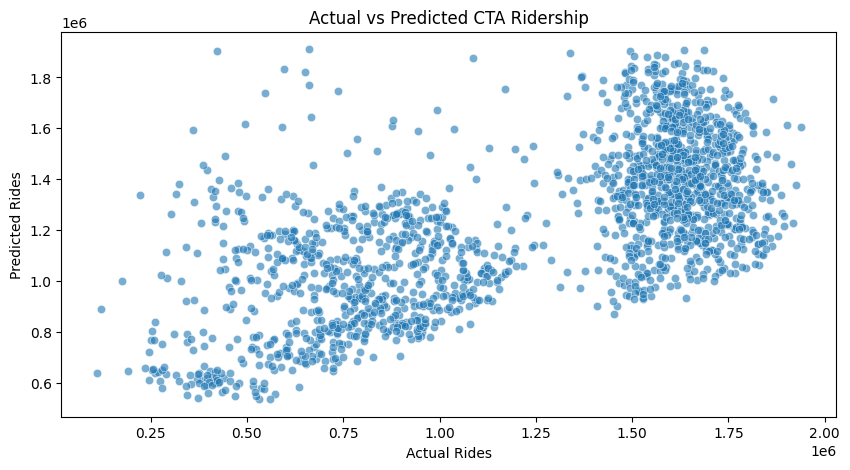

In [24]:
# Visualizing Predictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Rides")
plt.ylabel("Predicted Rides")
plt.title("Actual vs Predicted CTA Ridership")
plt.show()